In [1]:
import matplotlib.pyplot as plt
import cv2,os
data_path=r"C:\Users\abdul\Desktop\knee model normal\Knee Osteoarthritis Detection and Doctor Recommendation System\Knee Dataset\Data"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'0Normal': 0, '1Mild': 1, '2Moderate': 2, '3Severe': 3}
['0Normal', '1Mild', '2Moderate', '3Severe']
[0, 1, 2, 3]


In [2]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [3]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
from keras.utils import np_utils
new_label=np_utils.to_categorical(label)

In [4]:
new_label.shape

(1832, 4)

In [5]:
data.shape

(1832, 256, 256, 1)

In [6]:
data.shape[1:]

(256, 256, 1)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.3)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

# Add another Convolution layer with 96 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
# Adding another pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Flattening the layer before fully connected layers
model.add(Flatten())

# Adding a fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))

# The final output layer with 5 neuron to predict the categorical classifcation
model.add(Dense(4, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      832       
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 96)        5

In [9]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
batchSize=256
ep=50
history= model.fit(x_train,y_train,batch_size=batchSize,epochs=ep,validation_split=.15)

Epoch 1/50
5/5 [==============================] - 225s 41s/step - loss: 2.7499 - accuracy: 0.2681 - val_loss: 1.3932 - val_accuracy: 0.2332
Epoch 2/50
5/5 [==============================] - 197s 39s/step - loss: 1.3904 - accuracy: 0.2626 - val_loss: 1.3845 - val_accuracy: 0.2902
Epoch 3/50
5/5 [==============================] - 192s 37s/step - loss: 1.3826 - accuracy: 0.2599 - val_loss: 1.3700 - val_accuracy: 0.3109
Epoch 4/50
5/5 [==============================] - 212s 40s/step - loss: 1.3769 - accuracy: 0.2994 - val_loss: 1.3551 - val_accuracy: 0.3420
Epoch 5/50
5/5 [==============================] - 200s 42s/step - loss: 1.3656 - accuracy: 0.2810 - val_loss: 1.3576 - val_accuracy: 0.3420
Epoch 6/50
5/5 [==============================] - 229s 45s/step - loss: 1.3629 - accuracy: 0.3343 - val_loss: 1.3219 - val_accuracy: 0.3886
Epoch 7/50
5/5 [==============================] - 212s 42s/step - loss: 1.3394 - accuracy: 0.3480 - val_loss: 1.3123 - val_accuracy: 0.4197
Epoch 8/50
5/5 [====

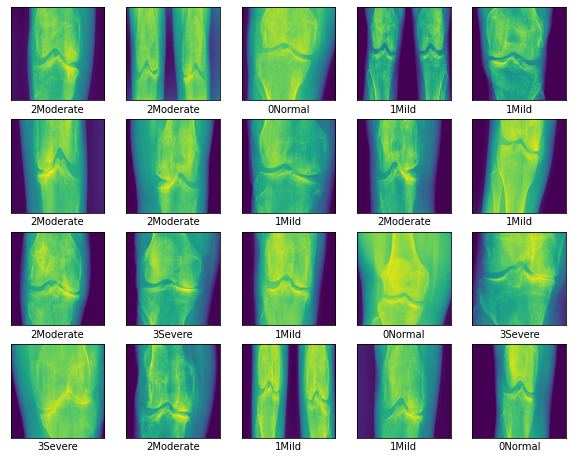

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

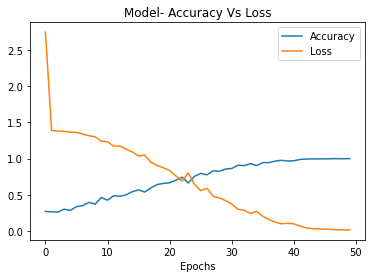

In [12]:
plt.plot(history.history['accuracy']),model.history.history['accuracy']
plt.plot(history.history['loss']),model.history.history['loss']
plt.title('Model- Accuracy Vs Loss')
plt.xlabel('Epochs')
plt.legend(['Accuracy', 'Loss'])
plt.show()

In [13]:
model.save('knee_model normal.h5')

In [14]:
from matplotlib import pyplot as plt

In [15]:
# # plot the training loss and accuracy
# N = 100 #number of epochs
# plt.style.use("ggplot")
# plt.figure()
# plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
# plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
# plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
# plt.title("Training Loss and Accuracy")
# plt.xlabel("Epoch #")
# plt.ylabel("Loss/Accuracy")
# plt.legend(loc="center right")
# plt.savefig("CNN_Model")

In [16]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 0.8535975217819214 %
test accuracy: 0.8345454335212708 %


1/1 [==============================] - 1s 766ms/step
A.I predicts: 1Mild
Correct prediction for label 1 is 1Mild


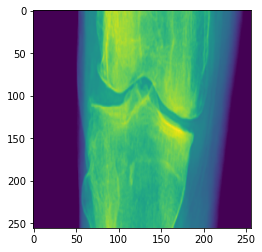

In [17]:
X = 32

img_size = 256

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

18/18 [==============================] - 7s 388ms/step


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (4).

<Figure size 432x288 with 0 Axes>

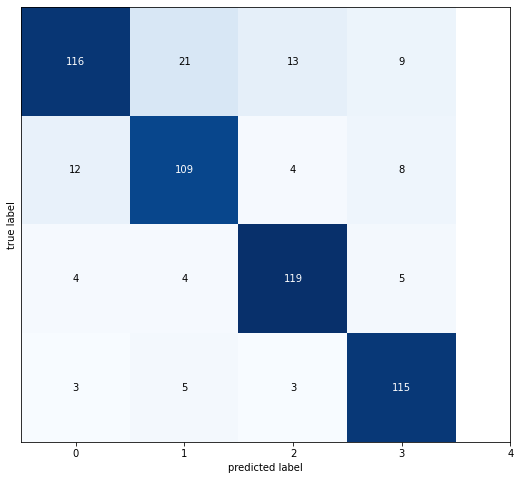

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Mid','Moderate','Severe'], fontsize=16)
plt.show()